In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
Iris=load_iris()
df=pd.DataFrame(Iris.data,columns=Iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Adding new columns for the species name
df['species']=pd.Categorical.from_codes(Iris.target,Iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Creating Test and Train Data
df['is_train']=np.random.uniform(1,0,len(df))<=.75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [5]:
#Creating Dataframes with test and train Rows
train,test=df[df['is_train']==True],df[df['is_train']==False]
#Show the Number of Observation for Test And  Training Dataset
print("Number of Observation in the Training Data",len(train))
print("Number of Observation in the Test Daa ",len(test))

Number of Observation in the Training Data 117
Number of Observation in the Test Daa  33


In [6]:
#Creating a List of Features Columns Names
features=df.columns[:4]
#View Features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
#converte Each Species name into Digits
y=pd.factorize(train['species'])[0]
#Viewing target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
#Creating Random Forest Classifier
clf=RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [9]:
#applying the trained Classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
#Viewing the predicted PRobabilities of the First 10 Observations
clf.predict_proba(test[features])[0:10]

array([[0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 0.  ]])

In [11]:
#mapping names for he plants for each predicted plant class
preds=Iris.target_names[clf.predict(test[features])]
preds[0:75]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype='<U10')

In [12]:
test['species'].head()

14    setosa
15    setosa
16    setosa
24    setosa
26    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [13]:
#Creating Confusion Matrix
pd.crosstab(test['species'],preds,rownames=['Actual spacies'],colnames=['Predicted Species'])
#Number of Actual PRedicted Values are 9+18+5=32
#Number of Inaccurate Values are 2

Predicted Species,setosa,versicolor,virginica
Actual spacies,,,
setosa,9,0,0
versicolor,0,18,1
virginica,0,0,5


In [14]:
predics=Iris.target_names[clf.predict([[7.0,0.6,1.4,1.0],[5.0,3.6,1.4,2.0]])]
predics

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['versicolor', 'setosa'], dtype='<U10')

In [ ]:
df = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df['target'] = Iris.target
df['species'] = df['target'].apply(lambda x: Iris.target_names[x])


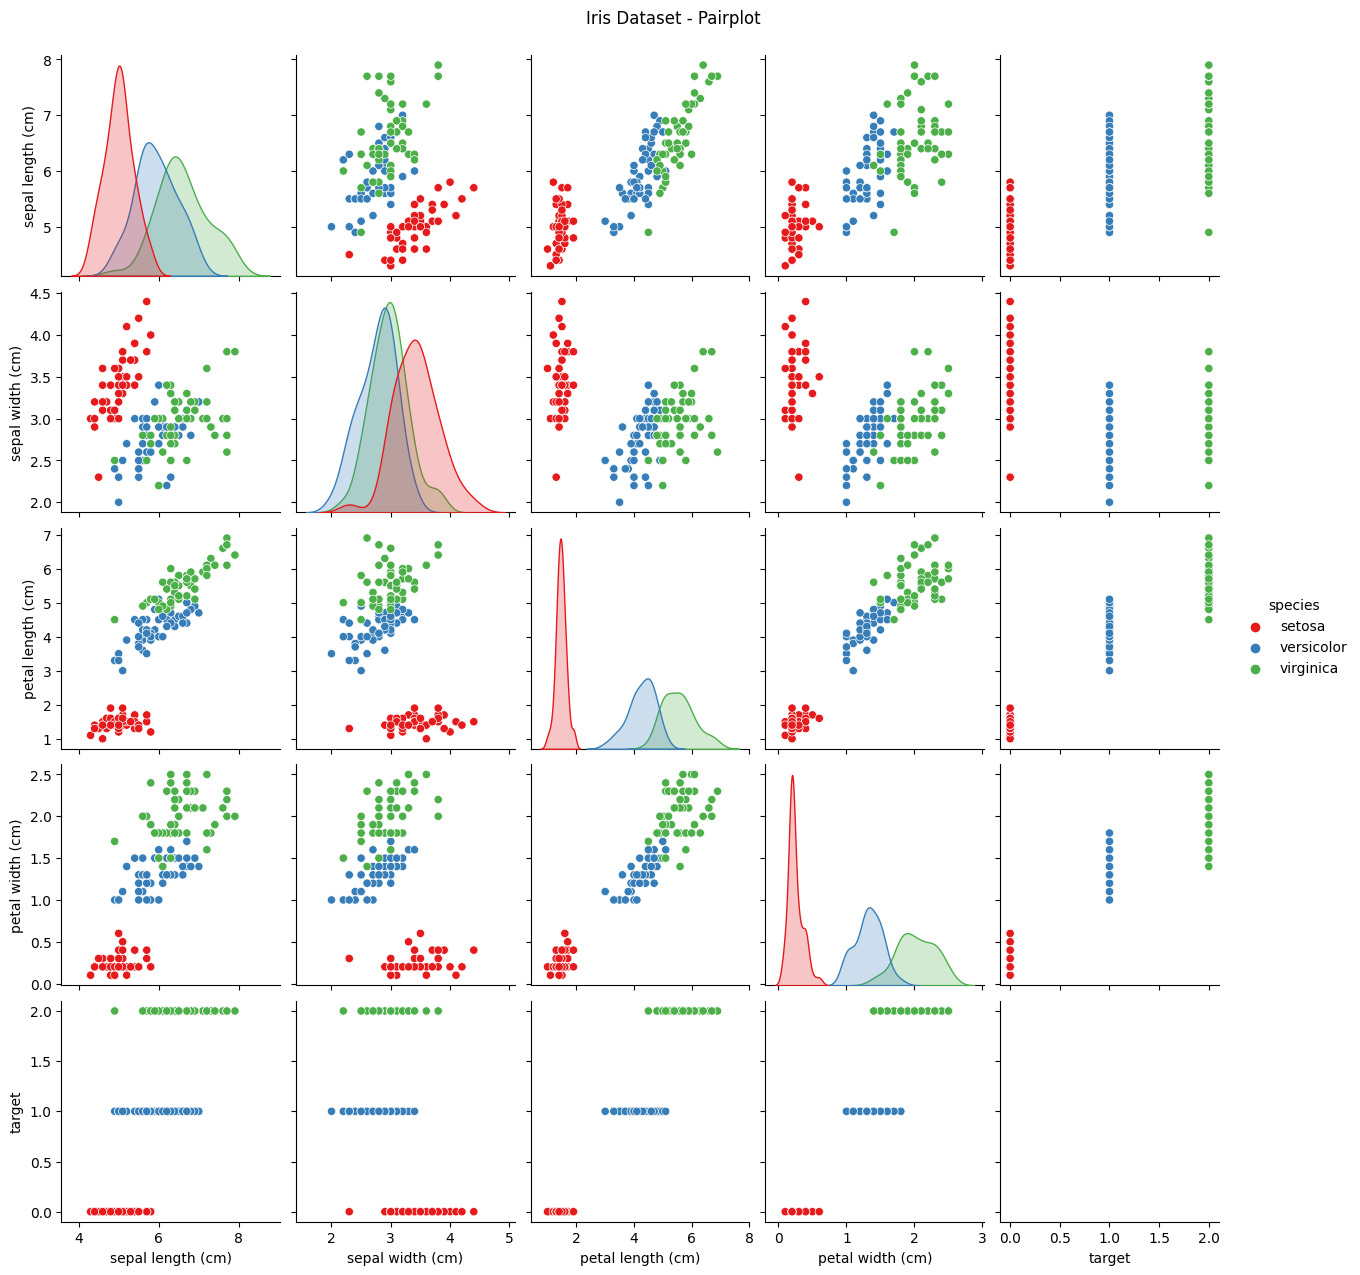

In [19]:
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Iris Dataset - Pairplot", y=1.02)
plt.show()


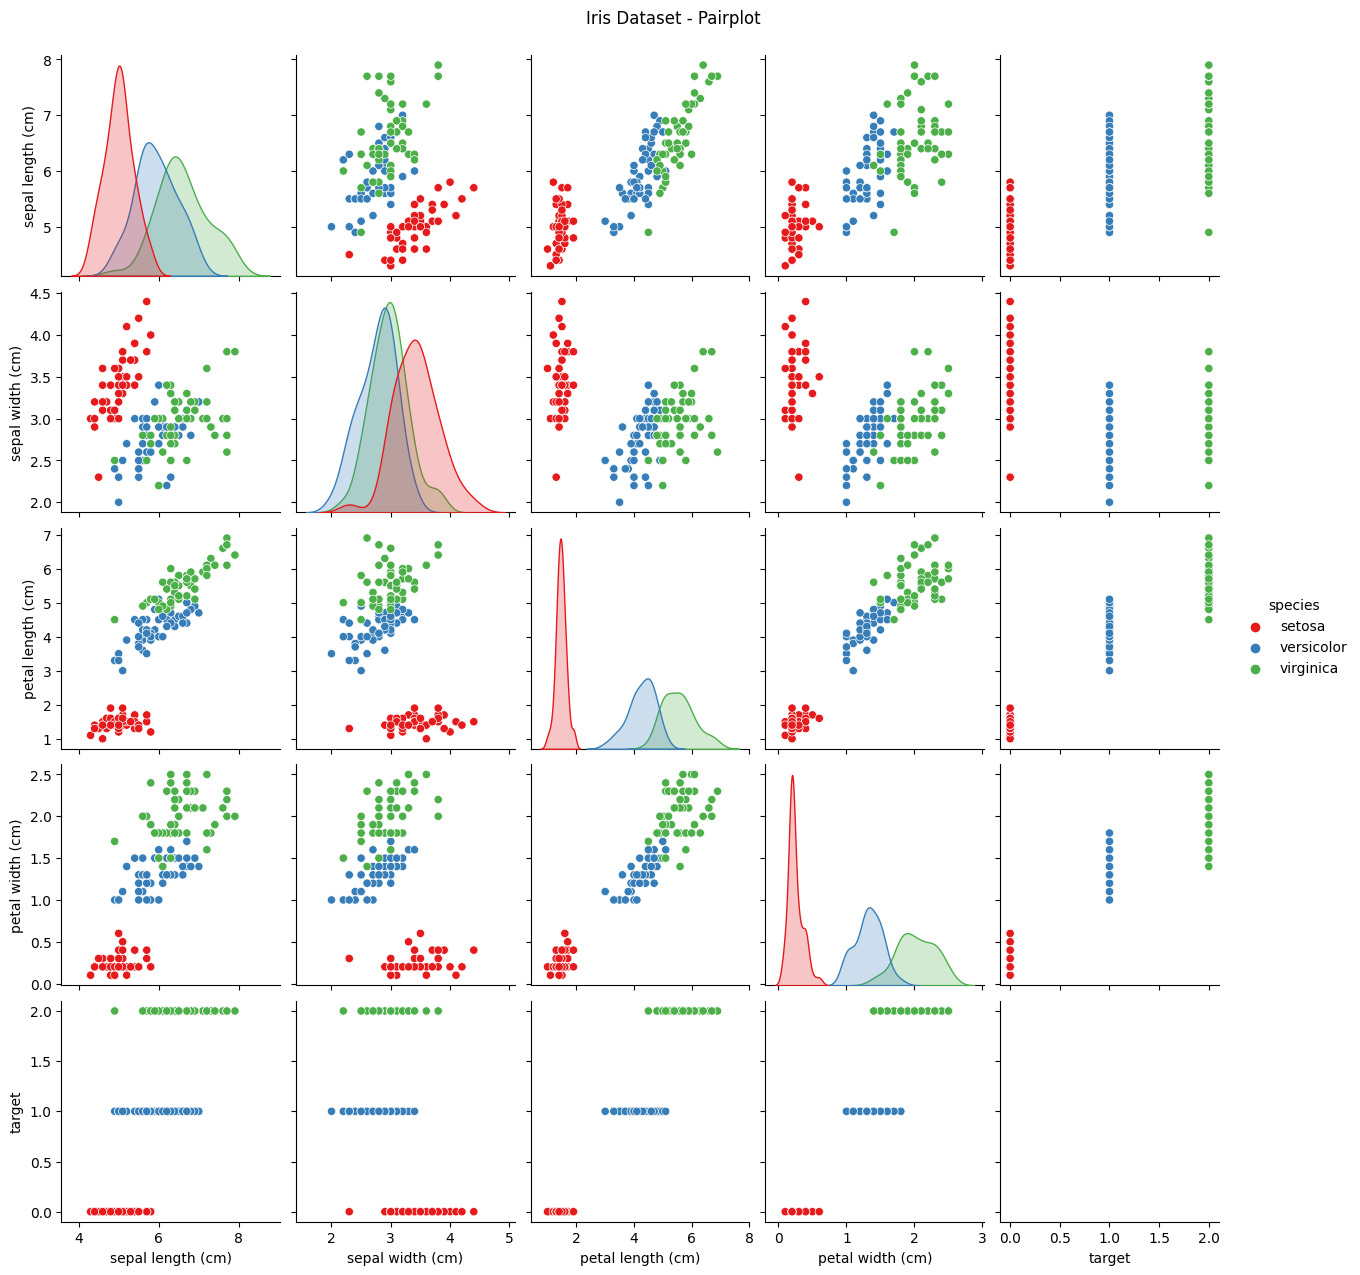

In [20]:
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Iris Dataset - Pairplot", y=1.02)
plt.show()


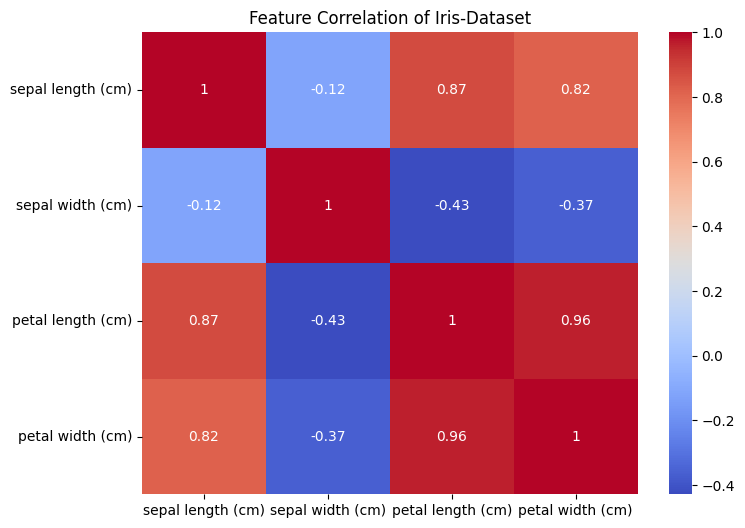

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation of Iris-Dataset")
plt.show()
